In [1]:
import os
import pandas as pd
import numpy as np                #for mathematical calculation
import matplotlib.pyplot as plt   #for plotting graph
from datetime import datetime     #to access datetime
from pandas import Series         #to work on series
%matplotlib inline
import warnings                   #to ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
#set working directory
os.chdir("D:/Analytics_vidhya/time_series")

In [3]:
# Now read the train and test data
train = pd.read_csv("Train_SU63ISt.csv")
test = pd.read_csv("Test_0qrQsBZ.csv")

In [4]:
train.shape

(18288, 3)

In [5]:
test.shape

(5112, 2)

In [6]:
train_original = train.copy()
test_original = test.copy()

In [7]:
train.columns , test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [8]:
#Look at the data types
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [9]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [10]:
test.shape, train.shape

((5112, 2), (18288, 3))

In [11]:
#data type conversion

train['Datetime'] = pd.to_datetime(train.Datetime)
test['Datetime'] = pd.to_datetime(test.Datetime)
train_original['Datetime'] = pd.to_datetime(train.Datetime)
test_original['Datetime'] = pd.to_datetime(test.Datetime)

In [12]:
train.dtypes, test.dtypes, train_original.dtypes , test_original.dtypes

(ID                   int64
 Datetime    datetime64[ns]
 Count                int64
 dtype: object, ID                   int64
 Datetime    datetime64[ns]
 dtype: object, ID                   int64
 Datetime    datetime64[ns]
 Count                int64
 dtype: object, ID                   int64
 Datetime    datetime64[ns]
 dtype: object)

In [13]:
for i in (train,test,test_original,train_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [14]:
train.head()

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [15]:
#Now extract weekends and weekdays
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [16]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [17]:
#Assign 1 for the day of week and 0 for the weekends
def applyer(row):
    if row.dayofweek ==5 or row.dayofweek ==6 :
        return 1
    else:
        return 0
    
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2


In [18]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


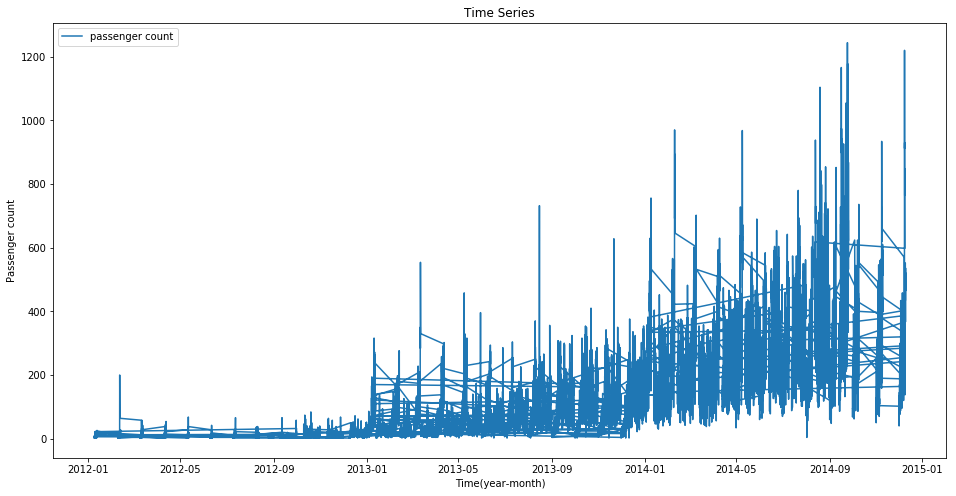

In [19]:
#Plot and observe the time series
train.index = train['Datetime'] #Indexing the datetime to get the time period on x axis
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label = 'passenger count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc="best")

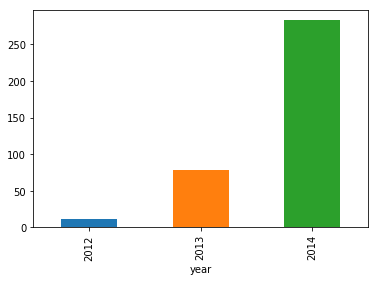

In [20]:
train.groupby('year')['Count'].mean().plot.bar()

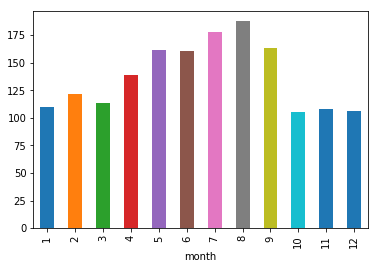

In [21]:
train.groupby('month')['Count'].mean().plot.bar()

In [22]:
train.columns

Index(['ID', 'Datetime', 'Count', 'year', 'month', 'day', 'hour',
       'day of week', 'weekend'],
      dtype='object')

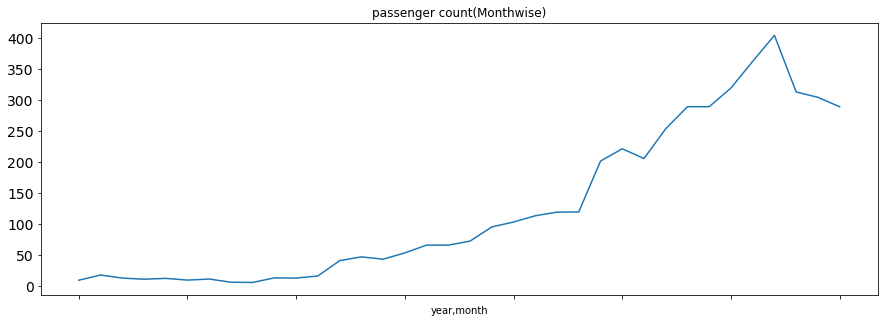

In [23]:
#Lets look monthly report of each year seperately
t = train.groupby(['year','month'])['Count'].mean()
t.plot(figsize= (15,5), title = 'passenger count(Monthwise)', fontsize = 14)

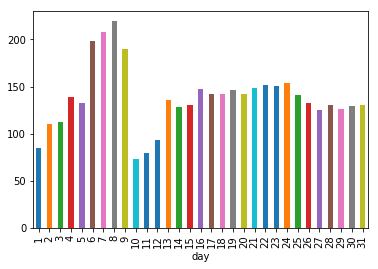

In [24]:
train.groupby('day')['Count'].mean().plot.bar()

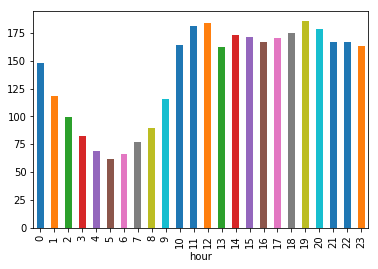

In [25]:
train.groupby('hour')['Count'].mean().plot.bar()

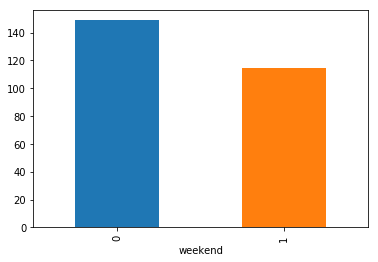

In [26]:
train.groupby('weekend')['Count'].mean().plot.bar()

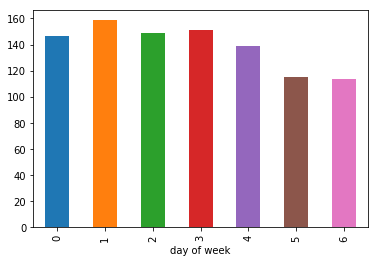

In [27]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [28]:
train = train.drop('ID',1)

In [29]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H %M')
train.index = train.Timestamp

In [30]:
#Hourly time series
hourly = train.resample('H').mean()

In [31]:
#Converting to daily mean
daily = train.resample('D').mean()

In [32]:
#Converting to weekly mean
weekly = train.resample('W').mean()

In [33]:
#Converting to monthly mean
monthly = train.resample('M').mean()

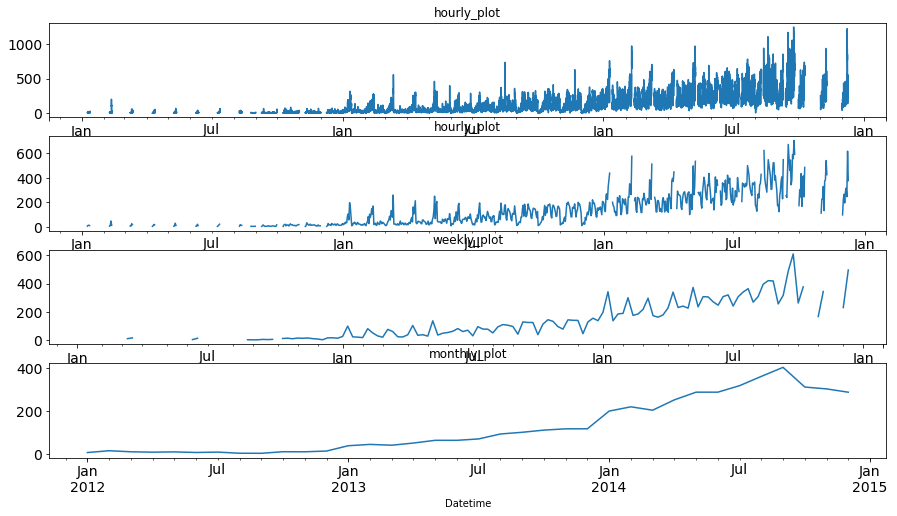

In [34]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize = (15,8) , title = 'hourly_plot', fontsize = 14, ax=axs[0])
daily.Count.plot(figsize = (15,8) , title = 'hourly_plot' , fontsize = 14 , ax=axs[1])
weekly.Count.plot(figsize = (15,8) , title = 'weekly_plot' , fontsize= 14,ax=axs[2])
monthly.Count.plot(figsize = (15,8) , title = 'monthly_plot' , fontsize = 14 , ax = axs[3])

plt.show()

In [35]:
test.Timestamp = pd.to_datetime(test.Datetime , format= '%d-%m-%Y %H:%M')
test.index = test.Timestamp

In [36]:
#Converting to daily mean
test = test.resample('D').mean()

In [37]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.index = train.Timestamp

In [38]:
#Converting to daily mean
train = train.resample('D').mean()

In [40]:
train.head(20)

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-01-09,4.666667,2012.0,1.0,9.0,11.5,0.0,0.0
2012-01-10,10.333333,2012.0,1.0,10.0,11.5,1.0,0.0
2012-01-11,12.666667,2012.0,1.0,11.0,11.5,2.0,0.0
2012-01-12,8.750000,2012.0,1.0,12.0,11.5,3.0,0.0
2012-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
pip install cv2


The following command must be run outside of the IPython shell:

    $ pip install cv2

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/
